#Installing & Importing Dependencies

In [ ]:
# !pip uninstall -y numpy
# !pip uninstall -y setuptools

In [ ]:
# !pip install setuptools
# !pip install numpy

In [ ]:
!pip install spectral
!pip install rarfile
!pip install pillow
!pip install pysptools
!pip install SSIM_PIL
!pip install image_similarity_measures

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysptools: filename=pysptools-0.15.0-py3-none-any.whl size=8133733 sha256=5897408bbb860007442675002c8a06a6dd6275a4868377ae22c9dccaf9b3a112
  Stored in directory: /root/.cache/pip/wheels/ea/08/3b/c045ea3722a5fef1f8698f060a17b59140235fef580fe4f1b5
Successfully built pysptools
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 55.3 MB/s eta 0:00:00
  Created wheel for phasepack: filename=phasepack-1.5-py3-none-any.whl size=26962 sha256=cab31dd2de4174dc7a722c90f6753c404b542ff95496471027a6e9fe6a2122d7
  Stored in directory: /root/.cache/pip/wheels/05/37/63/26a896aa2113f7eac15120c277787dcdad4a9b70cace22251f
Successfully built phasepack
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
 

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pysptools
from PIL import Image

from spectral import *
import rarfile
import os
import shutil

import spectral.io.envi as envi
from pysptools import *
# import pysptools.noise as noise

import pysptools.util as util
import pysptools.eea as eea
import pysptools.abundance_maps as amp

import glob

from skimage import data, measure, img_as_float
import skimage.exposure
from skimage.morphology import skeletonize, medial_axis, thin, skeletonize_3d
from skimage.util import invert
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from image_similarity_measures.quality_metrics import sam

/usr/local/lib/python3.10/dist-packages/phasepack/tools.py:11: UserWarning: 
Module 'pyfftw' (FFTW Python bindings) could not be imported. To install it, try
running 'pip install pyfftw' from the terminal. Falling back on the slower
'fftpack' module for 2D Fourier transforms.
  warnings.warn("""


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Saving Individual Channels in a zip file

In [ ]:
file = np.load('/content/drive/MyDrive/data/25Bg3.npy')
file = file.transpose(1,2,0)
file = np.array(file)
file.shape

(800, 640, 240)

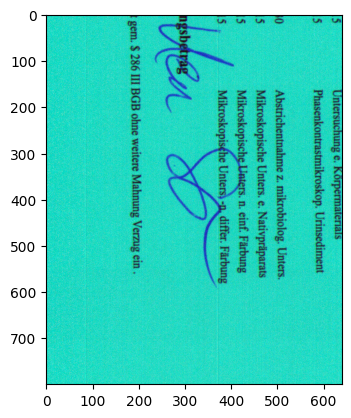

In [ ]:
# imshow(hsi_signature_nparr, (100,100,100))
img = imshow(file)


In [ ]:
os.mkdir("25Bg3")

In [ ]:
for i in range(file.shape[2]):
  print(i)
  figName = "/content/25Bg3/channel_" + str(i) + ".jpg"
  plt.imsave(figName, file[:,:,i], cmap = "gray")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239


In [ ]:
!zip -r 25Bg3.zip /content/25Bg3

  adding: content/25Bg3/ (stored 0%)
  adding: content/25Bg3/channel_70.jpg (deflated 1%)
  adding: content/25Bg3/channel_170.jpg (deflated 2%)
  adding: content/25Bg3/channel_149.jpg (deflated 2%)
  adding: content/25Bg3/channel_182.jpg (deflated 2%)
  adding: content/25Bg3/channel_10.jpg (deflated 1%)
  adding: content/25Bg3/channel_43.jpg (deflated 1%)
  adding: content/25Bg3/channel_143.jpg (deflated 2%)
  adding: content/25Bg3/channel_210.jpg (deflated 2%)
  adding: content/25Bg3/channel_203.jpg (deflated 2%)
  adding: content/25Bg3/channel_102.jpg (deflated 1%)
  adding: content/25Bg3/channel_131.jpg (deflated 2%)
  adding: content/25Bg3/channel_63.jpg (deflated 1%)
  adding: content/25Bg3/channel_92.jpg (deflated 1%)
  adding: content/25Bg3/channel_217.jpg (deflated 2%)
  adding: content/25Bg3/channel_68.jpg (deflated 1%)
  adding: content/25Bg3/channel_224.jpg (deflated 2%)
  adding: content/25Bg3/channel_83.jpg (deflated 1%)
  adding: content/25Bg3/channel_233.jpg (deflated 2%

In [ ]:
import shutil
shutil.copy("/content/25Bg3.zip", "/content/drive/MyDrive/data")

'/content/drive/MyDrive/data/25Bf21.zip'

#Pre-processing Image

##Load file from numpy array

In [ ]:
file = np.load('/content/drive/MyDrive/data/25Bg3.npy')
# np.array(file)
file.shape

(240, 800, 640)

In [ ]:
file = file.transpose(1,2,0)

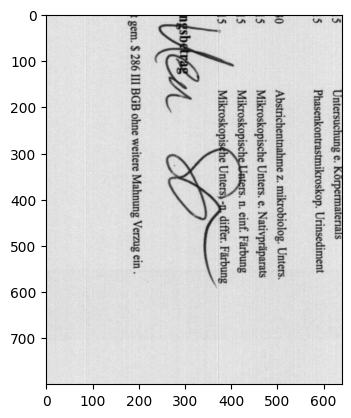

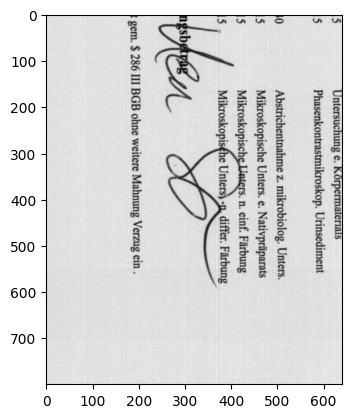

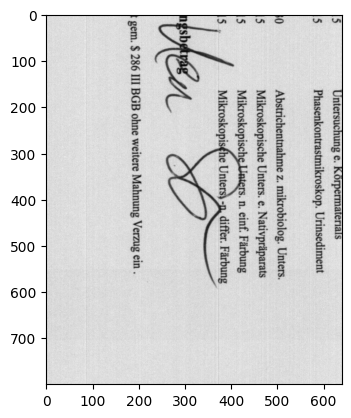

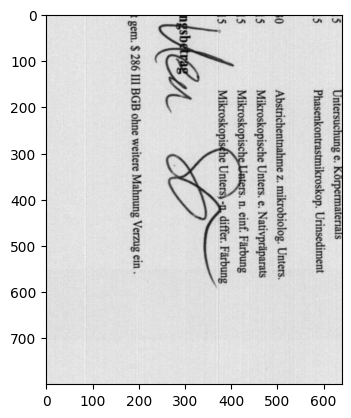

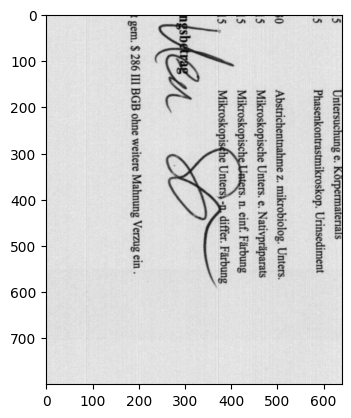

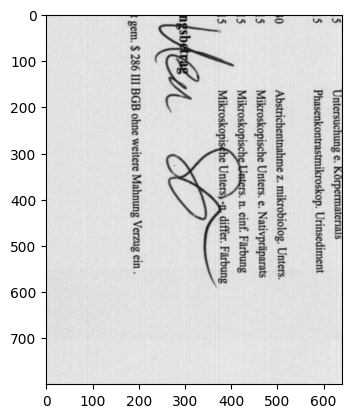

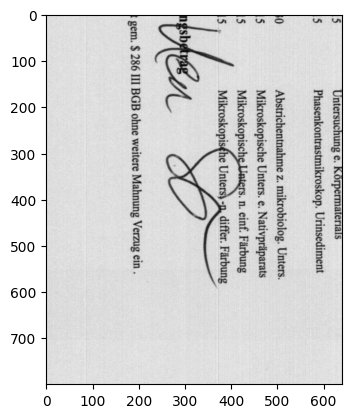

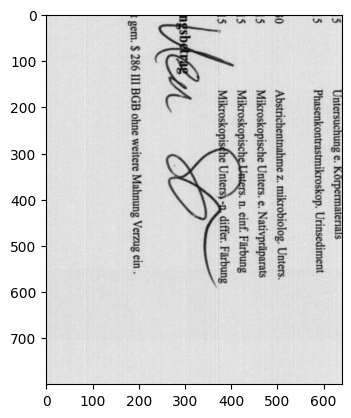

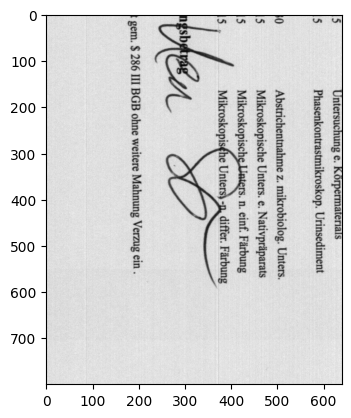

In [ ]:
img_arr = []
arr = file.shape

for i in range(arr[2]):
  if i > 50 and i < 60:
    imshow(file[:,:,i])

##Loading image from HSI .hdr & .bil file

In [ ]:
hsi_signature = envi.open('/content/drive/MyDrive/data/HSI FILES/3.bil.hdr', '/content/drive/MyDrive/data/HSI FILES/3.bil')


In [ ]:
hsi_signature_nparr = np.array(hsi_signature.load())


In [ ]:
hsi_signature_nparr.shape
# hsi_signature_nparr.__class__


(800, 640, 240)

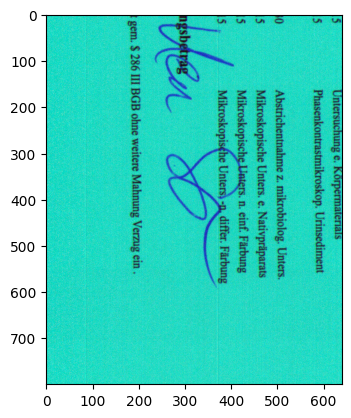

In [ ]:
img = imshow(hsi_signature_nparr)


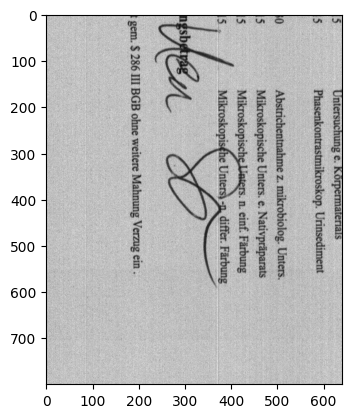

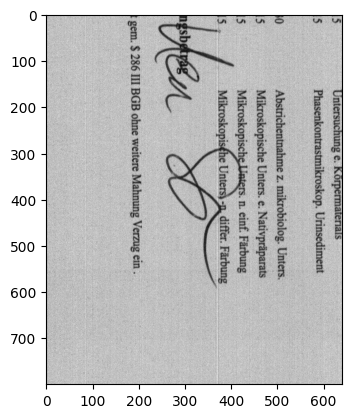

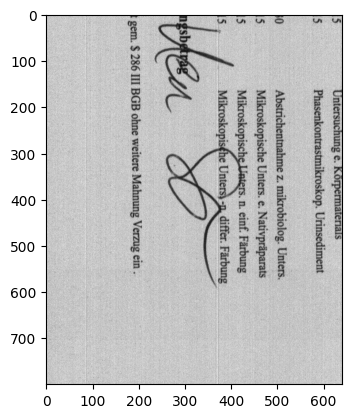

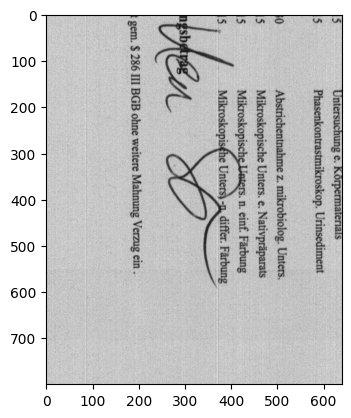

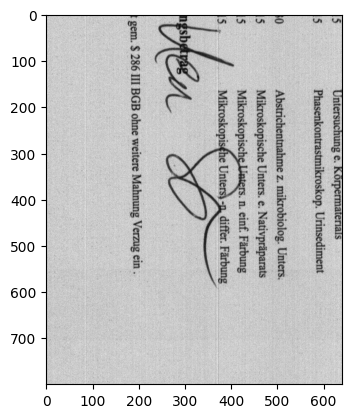

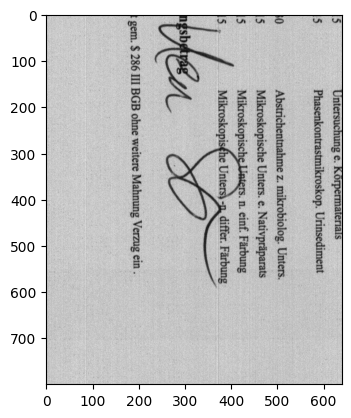

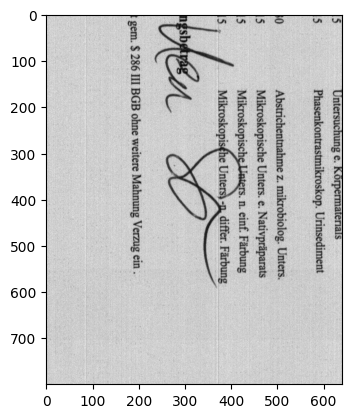

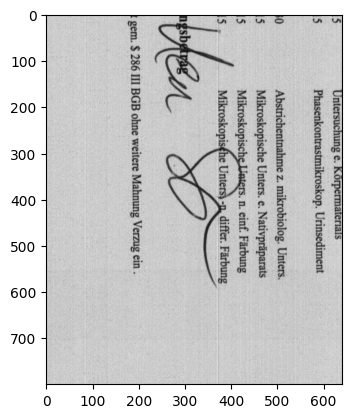

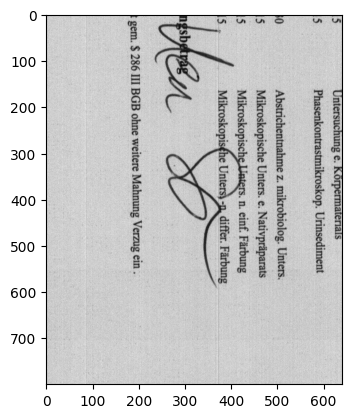

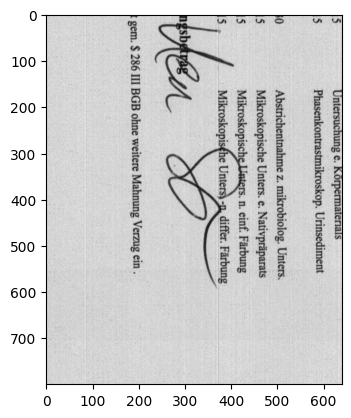

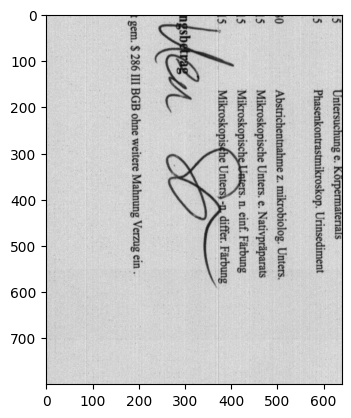

In [ ]:
img_arr = []
arr = hsi_signature_nparr.shape

for i in range(arr[2]):
  # if i == 170:
  if i >= 15 and i <= 25:
    imshow(hsi_signature_nparr[:,:,i])

##Load Groud Truth

In [ ]:
import zipfile

local_zip = '/content/drive/MyDrive/data/truths.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/truths')

zip_ref.close()

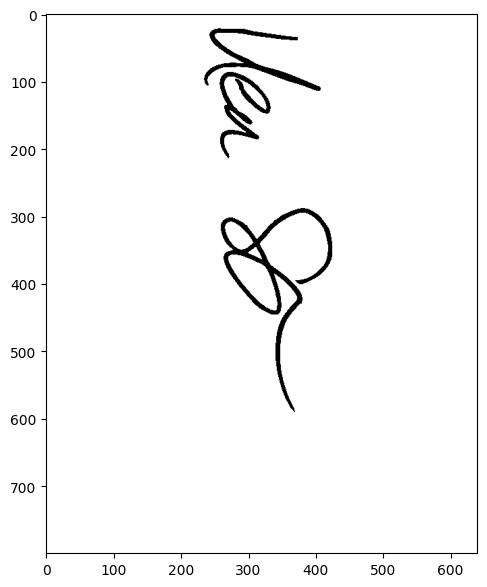

In [ ]:
truth = cv2.imread('/content/drive/MyDrive/data/truths/truths/25B_g_3.png')
plt.subplots(figsize=(7, 7))
plt.imshow(truth)

##Loading file from .zip file containing individual channel images

In [ ]:
import zipfile

local_zip = '/content/drive/MyDrive/data/25Bg3.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/25Bg3')

zip_ref.close()

In [ ]:
img1_path = "/content/25Bg3/content/25Bg3/channel_30.jpg"
img2_path = "/content/25Bg3/content/25Bg3/channel_180.jpg"

In [ ]:
def get_images(img1_path, img2_path):
  img1 = cv2.imread(img1_path)
  img2 = cv2.imread(img2_path)

  plt.subplots(figsize=(7, 7))

  plt.subplot(1, 2, 1)  # row 1, column 2, count 1
  plt.imshow(img1)
  plt.title('Channel_30')

  plt.subplot(1, 2, 2)
  plt.imshow(img2)
  plt.title('Channel_180')

  plt.tight_layout()

  plt.show()
  return img1, img2

<ipython-input-68-07143f6e2035>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)  # row 1, column 2, count 1


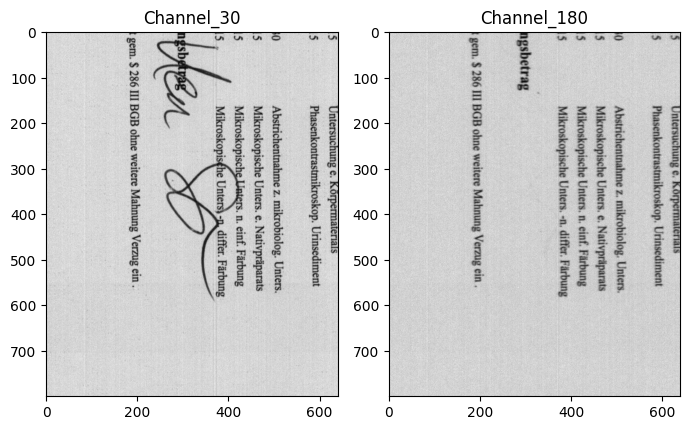

In [ ]:
img1, img2 = get_images(img1_path,img2_path)

##Pre-processing

In [ ]:
def denoise(img1, img2):
  dn_img1 = cv2.fastNlMeansDenoisingColored(img1, None, 10, 10, 5, 15)
  dn_img2 = cv2.fastNlMeansDenoisingColored(img2, None, 10, 10, 5, 7)

  plt.subplots(figsize=(10, 10))

  plt.subplot(1, 2, 1)  # row 1, column 2, count 1
  plt.imshow(dn_img1)
  plt.title('CHannel_30')

  plt.subplot(1, 2, 2)
  plt.imshow(dn_img2)
  plt.title('Channel_180')

  plt.tight_layout()

  plt.show()
  return dn_img1, dn_img2

<ipython-input-72-d786ee10dd9d>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)  # row 1, column 2, count 1


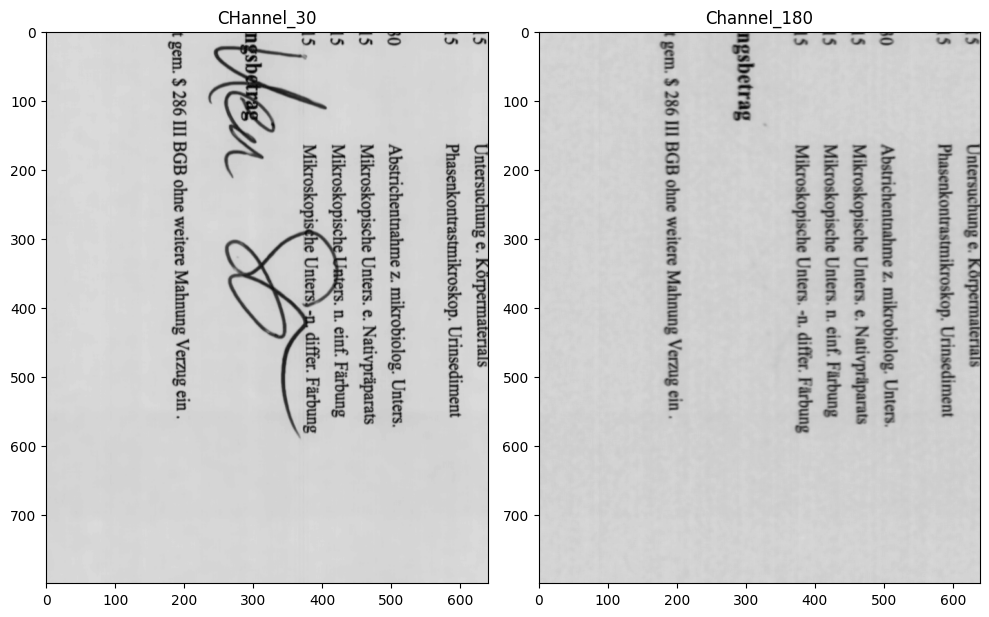

In [ ]:
dn_img1, dn_img2 = denoise(img1,img2)

In [ ]:
def im_bw(dn_img1, dn_img2):
  thresh1 = 100         #100
  im_bw1 = cv2.threshold(dn_img1, thresh1, 255, cv2.THRESH_BINARY)[1]
  thresh2 = 140         #140
  im_bw2 = cv2.threshold(dn_img2, thresh2, 255, cv2.THRESH_BINARY)[1]

  plt.subplots(figsize=(10, 10))

  plt.subplot(1, 2, 1)  # row 1, column 2, count 1
  plt.imshow(im_bw1)
  plt.title('Channel_30')

  plt.subplot(1, 2, 2)
  plt.imshow(im_bw2)
  plt.title('Channel_180')


  plt.tight_layout()

  plt.show()
  return im_bw1, im_bw2


<ipython-input-74-3a536011c044>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)  # row 1, column 2, count 1


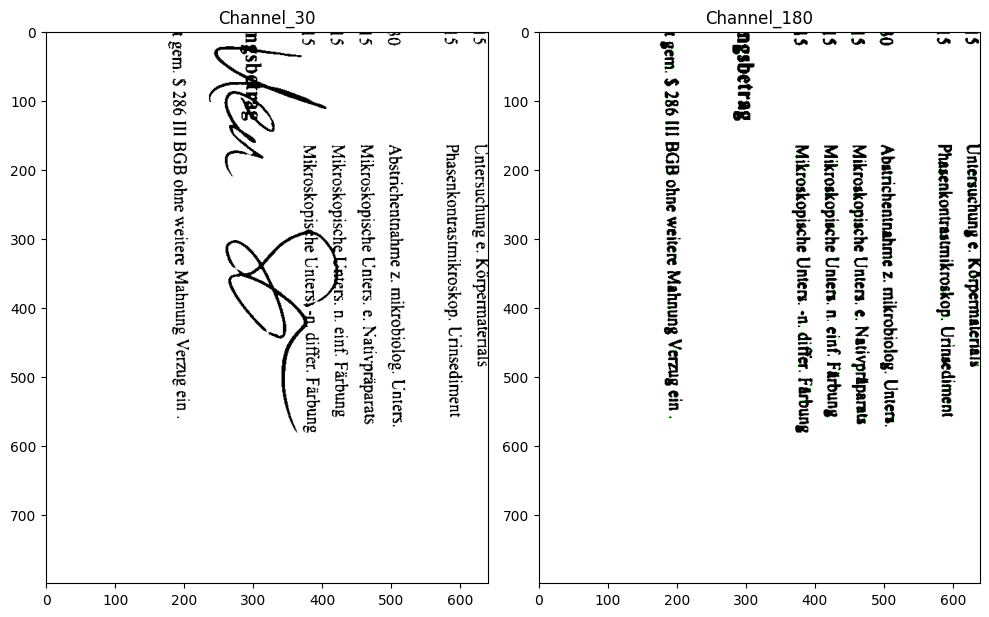

In [ ]:
im_bw1, im_bw2 = im_bw(dn_img1, dn_img2)

#Printed Text

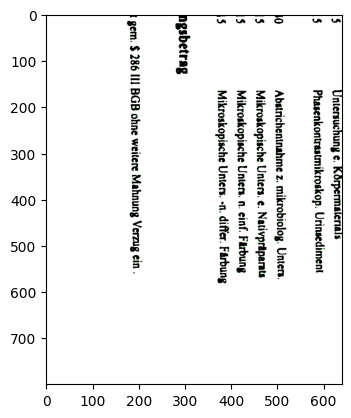

In [ ]:
plt.imshow(im_bw2)

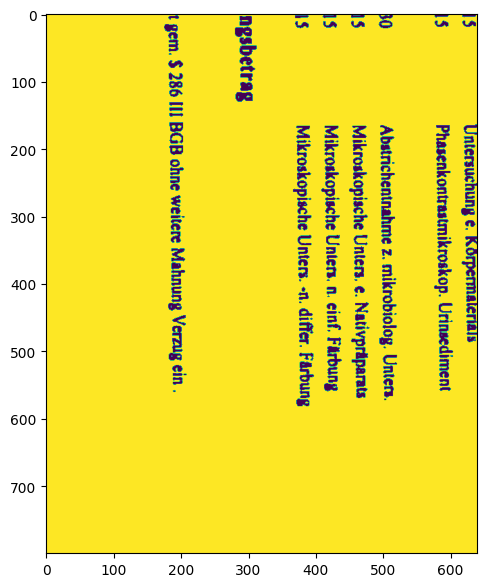

In [ ]:
printed_text = cv2.cvtColor(im_bw2, cv2.COLOR_RGB2GRAY)
plt.figure(figsize = (7, 7))
plt.imshow(printed_text)

In [ ]:
printed_text.shape

(800, 640)

27906


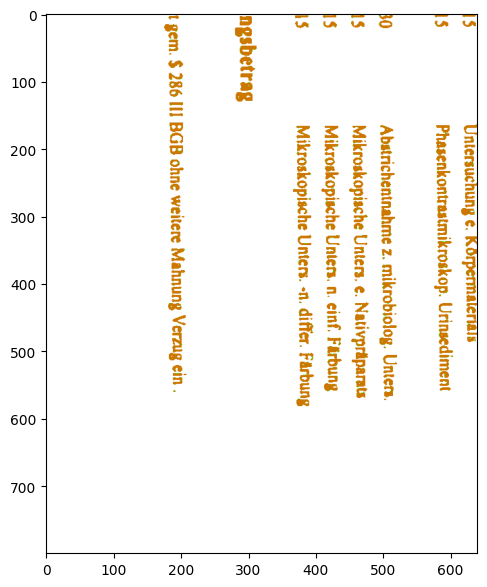

In [ ]:
Printed_text_copy = im_bw2.copy()
gray = cv2.cvtColor(im_bw2, cv2.COLOR_BGR2GRAY)

# Set threshold level
threshold_level = 50

# Find coordinates of all pixels below threshold
printed_pixels_coords = np.column_stack(np.where(gray < threshold_level))
printed_pixels_coords_list = printed_pixels_coords.tolist()
print(len(printed_pixels_coords_list))

# Create mask of all pixels lower than threshold level
mask = gray < threshold_level

# Color the pixels in the mask
Printed_text_copy = im_bw2.copy()
Printed_text_copy[mask] = (204, 119, 0)

plt.figure(figsize = (7, 7))
plt.imshow(Printed_text_copy)
# cv2.waitKey()

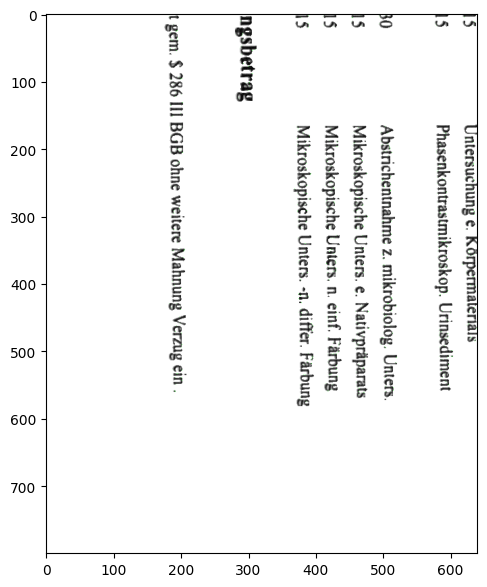

In [ ]:
def overlapping_region(im1, im2):
  img4 = cv2.bitwise_and(cv2.bitwise_not(im1) , cv2.bitwise_not(im2))

  plt.figure(figsize = (7, 7))
  plt.imshow(img4)

  return img4

printed_text = overlapping_region(img1, im_bw2)

imagem222 = cv2.bitwise_not(printed_text)
plt.imshow(imagem222)

In [ ]:
def printed_text(im_bw2):
  totalPixels = im_bw2[:,:,0].shape[0] * im_bw2[:,:,0].shape[1]
  colorPixels = np.sum(im_bw2[:, :, 0]) / 255

  perPixels = colorPixels / totalPixels
  # print("Percentage of white pixels:", perPixels*100)
  print("Percentage of printed text:", (1-perPixels)*100)

In [ ]:
printed_text(im_bw2)

Percentage of printed text: 5.573242187500005


In [ ]:
def signature_percentage(im1, im2):
  img3 = im1 - im2
  invt_img3 = cv2.bitwise_not(img3)
  dn_img3 = cv2.fastNlMeansDenoisingColored(invt_img3, None, 55, 55, 5, 55)

  plt.subplots(figsize=(10, 10))

  plt.subplot(1, 3, 1)  # row 1, column 2, count 1
  plt.imshow(img3)
  plt.title('FIRST IMAGE')

  plt.subplot(1, 3, 2)
  plt.imshow(invt_img3)
  plt.title('SECOND IMAGE')

  plt.subplot(1, 3, 3)
  plt.imshow(dn_img3)
  plt.title('THIRD IMAGE')

  plt.tight_layout()

  plt.show()

  totalPixels_img3 = dn_img3[:,:,0].shape[0] * dn_img3[:,:,0].shape[1]
  colorPixels_img3 = np.sum(dn_img3[:, :, 0]) / 255
  perPixels_img3 = colorPixels_img3 / totalPixels_img3
  # print("Percentage of white pixels:", perPixels_img3*100)
  print("Percentage of signature:", (1-perPixels_img3)*100)
  return dn_img3

<ipython-input-83-b7522389c696>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)  # row 1, column 2, count 1


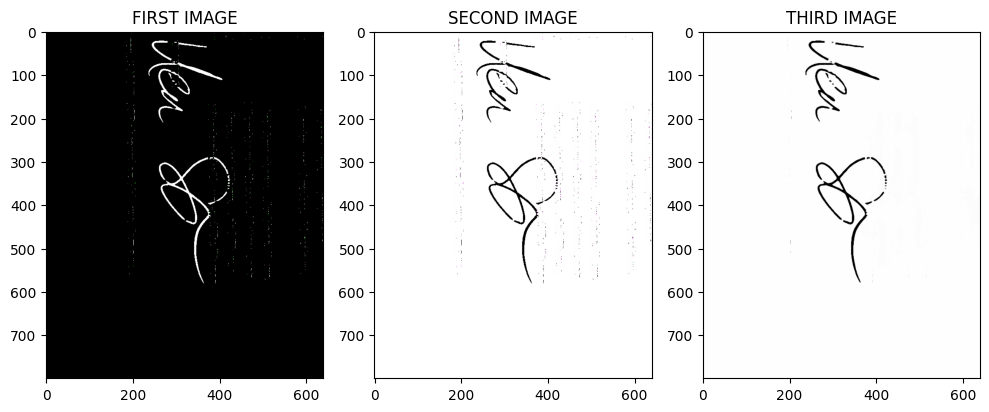

Percentage of signature: 1.8161894914215715


In [ ]:
dn_img3 = signature_percentage(im_bw2 , im_bw1)

#Handwritten Pixels with Overlapping Region

(800, 640, 3)

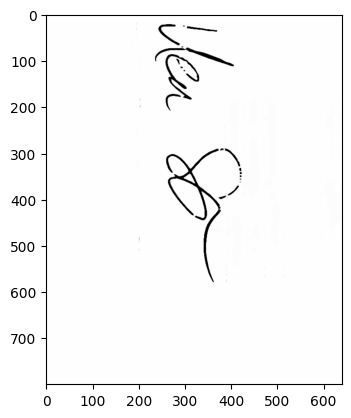

In [ ]:
#handwritten pixels
plt.imshow(dn_img3)
dn_img3.shape

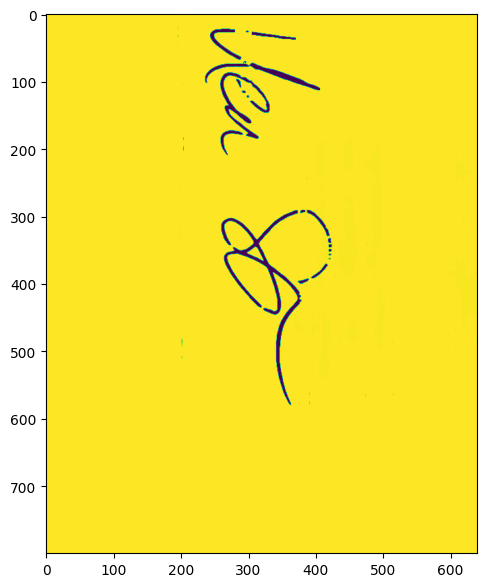

In [ ]:
imagedn3 = cv2.cvtColor(dn_img3, cv2.COLOR_RGB2GRAY)
plt.figure(figsize = (7, 7))
plt.imshow(imagedn3)

In [ ]:
imagedn3.shape

(800, 640)

9001


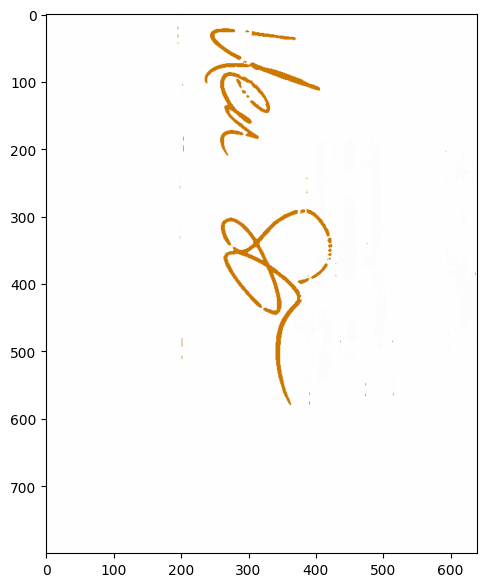

In [ ]:
imagedn3_copy = dn_img3.copy()
gray = cv2.cvtColor(dn_img3, cv2.COLOR_BGR2GRAY)

# Set threshold level
threshold_level = 242

# Find coordinates of all pixels below threshold
handwritten_pixels_coords = np.column_stack(np.where(gray < threshold_level))
handwritten_pixels_coords_list = handwritten_pixels_coords.tolist()
print(len(handwritten_pixels_coords_list))

# Create mask of all pixels lower than threshold level
mask = gray < threshold_level

# Color the pixels in the mask
imagedn3_copy = dn_img3.copy()
imagedn3_copy[mask] = (204, 119, 0)

plt.figure(figsize = (7, 7))
plt.imshow(imagedn3_copy)
# cv2.waitKey()

In [ ]:
imagedn3_copy.shape

(800, 640, 3)

In [ ]:
# load image
original_img = imagedn3_copy
# convert to gray
gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
# threshold
thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)[1]
# blur threshold image
blur = cv2.GaussianBlur(thresh, (0,0), sigmaX=2, sigmaY=1, borderType = cv2.BORDER_DEFAULT)
# stretch so that 255 -> 255 and 127.5 -> 0
stretch = skimage.exposure.rescale_intensity(blur, in_range=(127.5,255), out_range=(0,255)).astype(np.uint8)
# threshold again
thresh2 = cv2.threshold(stretch, 128, 255, cv2.THRESH_BINARY)[1]

kernel = np.ones((3,2),np.uint8)
erosion = cv2.erode(thresh2,kernel,iterations = 3)

img_masked = cv2.bitwise_and(original_img, original_img, mask=erosion)


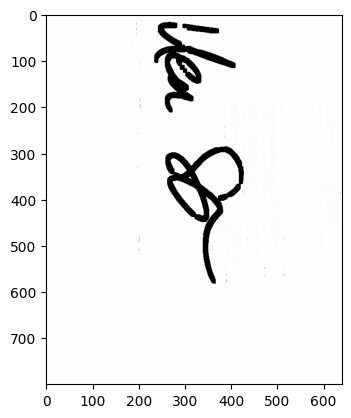

In [ ]:
plt.imshow(img_masked, 'gray')

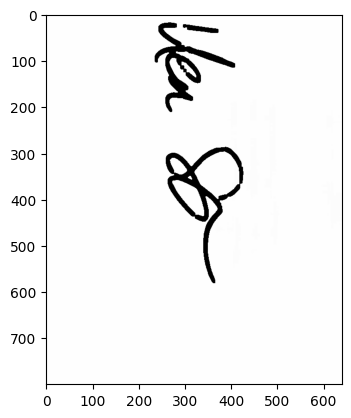

In [ ]:
kernel = np.ones((3,3),np.uint8)
dilate = cv2.dilate(img_masked,kernel,iterations = 1)
plt.imshow(dilate, 'gray')


In [ ]:
# load image
original_img = imagedn3_copy
# convert to gray
gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
# threshold
thresh = cv2.threshold(gray, 200, 250, cv2.THRESH_BINARY)[1]
# blur threshold image
blur = cv2.GaussianBlur(thresh, (0,0), sigmaX=2, sigmaY=1, borderType = cv2.BORDER_DEFAULT)
# stretch so that 255 -> 255 and 127.5 -> 0
stretch = skimage.exposure.rescale_intensity(blur, in_range=(127.5,255), out_range=(0,255)).astype(np.uint8)
# threshold again
thresh2 = cv2.threshold(stretch, 128, 255, cv2.THRESH_BINARY)[1]

kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(thresh2,kernel,iterations = 3)

img_masked = cv2.bitwise_and(original_img, original_img, mask=erosion)

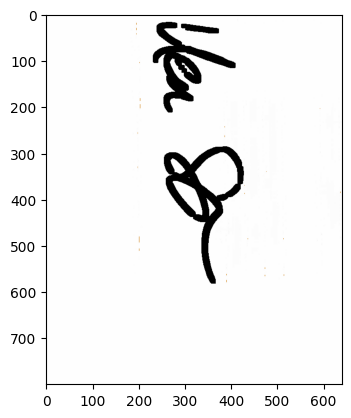

In [ ]:
plt.imshow(img_masked, 'gray')

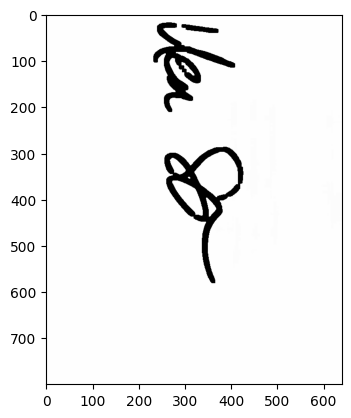

In [ ]:
kernel = np.ones((3,3),np.uint8)
dilate = cv2.dilate(img_masked,kernel,iterations = 1)
plt.imshow(dilate, 'gray')


In [ ]:
dilate.shape

(800, 640, 3)

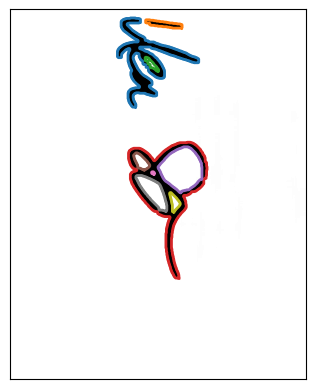

In [ ]:
#colored contours
# Invert the image
image = dilate.copy()
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

contours = measure.find_contours(image, 0.8, fully_connected='high')
contour = sorted(contours, key=lambda x: len(x))[-1]

fig, ax = plt.subplots()
ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)
for n, contour in enumerate(contours):
   ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.xaxis.label.set_color('black')        #setting up X-axis label color to yellow
ax.yaxis.label.set_color('black')          #setting up Y-axis label color to blue

ax.tick_params(axis='x', colors='black')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='black')

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()
fig.savefig('1.png', bbox_inches='tight')

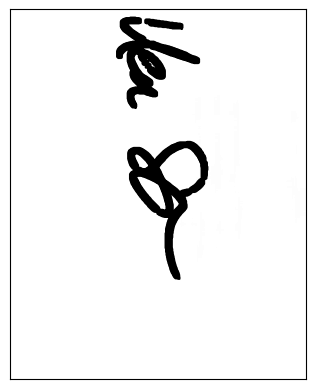

In [ ]:
#black contours
# Invert the image
image = dilate.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

contours = measure.find_contours(image, 0.8, fully_connected='high')

# Get the contour with the maximum length
contour = sorted(contours, key=lambda x: len(x))[-1]

fig, ax = plt.subplots()
ax.imshow(image, interpolation='nearest', cmap=plt.cm.gray)

# Plot all contours in black
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], 'k-', linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()
fig.savefig('1.png', bbox_inches='tight')


In [ ]:
res = cv2.imread('/content/1.png')
res.shape

(389, 315, 3)

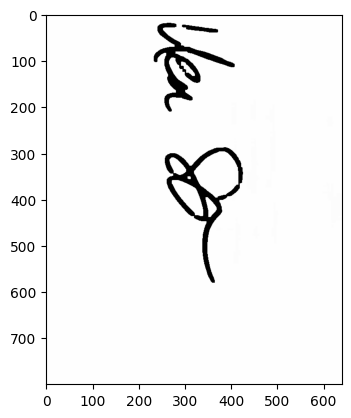

In [ ]:
kernel = np.ones((5,5),np.uint8)
dilate222 = cv2.dilate(img_masked,kernel,iterations = 1)
plt.imshow(dilate222, 'gray')

In [ ]:
def overlapping_region(im1, im2):
  img4 = cv2.bitwise_and(cv2.bitwise_not(im1) , cv2.bitwise_not(im2))

  plt.figure(figsize = (5, 5))
  plt.imshow(img4)

  return img4

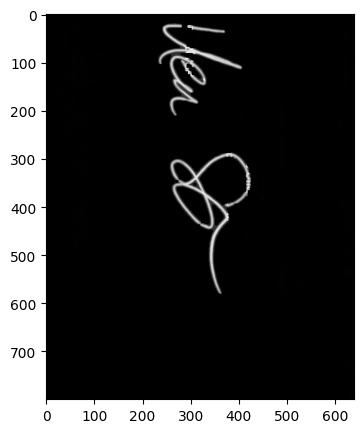

In [ ]:
signature222 = overlapping_region(dn_img1, dilate222)

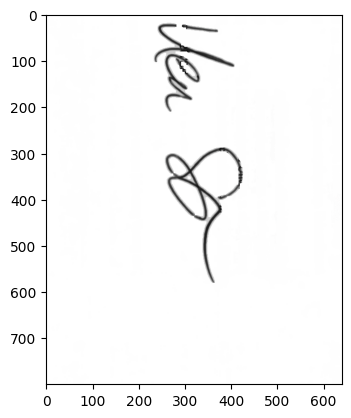

In [ ]:
imagem222 = cv2.bitwise_not(signature222)
plt.imshow(imagem222)

9732


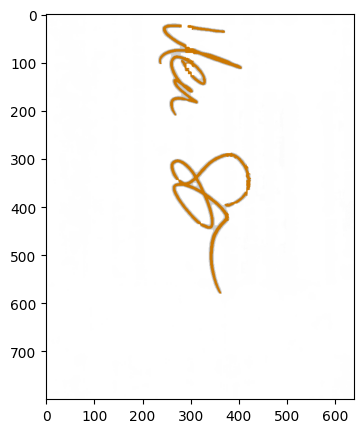

In [ ]:
imagedn3_copy = imagem222.copy()
gray = cv2.cvtColor(imagem222, cv2.COLOR_BGR2GRAY)

# Set threshold level
threshold_level = 150

# Find coordinates of all pixels below threshold
handwritten_pixels_coords = np.column_stack(np.where(gray < threshold_level))
handwritten_pixels_coords_list = handwritten_pixels_coords.tolist()
print(len(handwritten_pixels_coords_list))

# Create mask of all pixels lower than threshold level
mask = gray < threshold_level

# Color the pixels in the mask
imagedn3_copy = imagem222.copy()
imagedn3_copy[mask] = (204, 119, 0)

plt.figure(figsize = (5, 5))
plt.imshow(imagedn3_copy)
# cv2.waitKey()

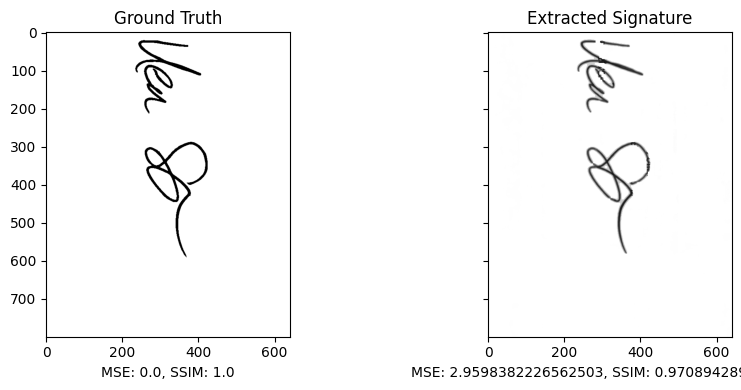

In [ ]:
gray_image_img1 = cv2.cvtColor(truth, cv2.COLOR_RGB2GRAY)
gray_image_signature = cv2.cvtColor(imagem222, cv2.COLOR_RGB2GRAY)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()

mse_none = (mean_squared_error(gray_image_img1, gray_image_img1))/100
ssim_none = ssim(gray_image_img1, gray_image_img1, multichannel=True)

mse_noise = (mean_squared_error(gray_image_img1, gray_image_signature))/100
ssim_noise = ssim(gray_image_img1, gray_image_signature, multichannel=True)

ax[0].imshow(gray_image_img1, cmap=plt.cm.gray)
ax[0].set_xlabel(f'MSE: {mse_none:}, SSIM: {ssim_none}')
ax[0].set_title('Ground Truth')

ax[1].imshow(gray_image_signature, cmap=plt.cm.gray)
ax[1].set_xlabel(f'MSE: {mse_noise:}, SSIM: {ssim_noise:}')
ax[1].set_title('Extracted Signature')

plt.tight_layout()
plt.show()

In [ ]:
out_sam = (sam(gray_image_img1, gray_image_signature))/100
print(out_sam)

0.8999832886710861


In [ ]:
#PYSPTOOLS SID FUNCTION
def SID(s1, s2):
    p = (s1 / np.sum(s1)) + np.spacing(1)
    q = (s2 / np.sum(s2)) + np.spacing(1)
    return np.sum(p * np.log(p / q) + q * np.log(q / p))


In [ ]:
import pysptools
sid = SID(gray_image_img1, gray_image_signature)
print(sid)

0.17990776221570864


#Overlapping Pixels

In [ ]:
def overlapping_region(im1, im2):
  img4 = cv2.bitwise_and(cv2.bitwise_not(im1) , cv2.bitwise_not(im2))

  plt.figure(figsize = (7, 7))
  plt.imshow(img4)

  totalPixels_img4 = img4[:,:,0].shape[0] * img4[:,:,0].shape[1]
  colorPixels_img4 = np.sum(img4[:, :, 0]) / 255

  perPixels_img4 = colorPixels_img4 / totalPixels_img4

  figName = "/content/overlappingMask_03" + ".jpg"
  # plt.imsave(figName, img4, cmap = "gray")
  plt.imsave(figName, img4, cmap='gray')

  print("Percentage of overlapping pixels:", perPixels_img4*100)
  return img4
  # print("Percentage of signature:", (1-perPixels_img3)*100)

Percentage of overlapping pixels: 0.032560508578431374


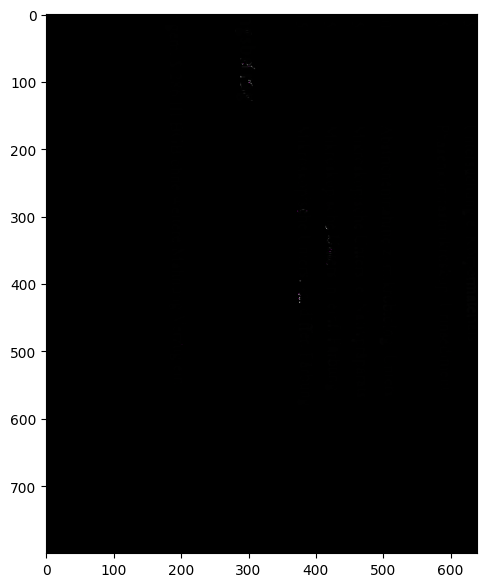

In [ ]:
img4 = overlapping_region(im_bw2, dn_img3)

In [ ]:
img4.shape

(800, 640, 3)

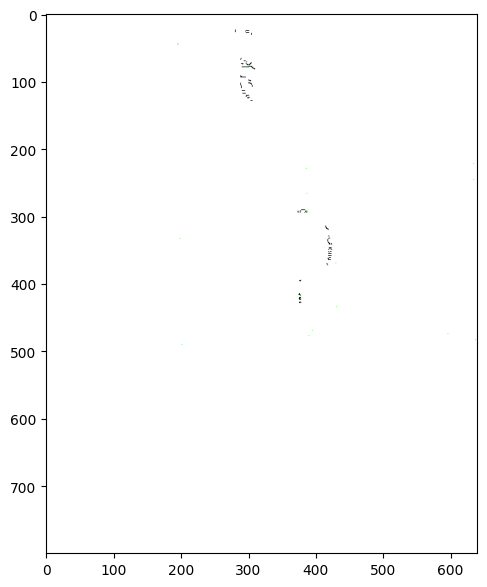

In [ ]:
thresh = cv2.threshold(img4, 3, 255, cv2.THRESH_BINARY_INV)[1]
# cv2.imshow("Thresh", thresh)
# cv2.waitKey(0)
plt.figure(figsize = (7, 7))
plt.imshow(thresh)

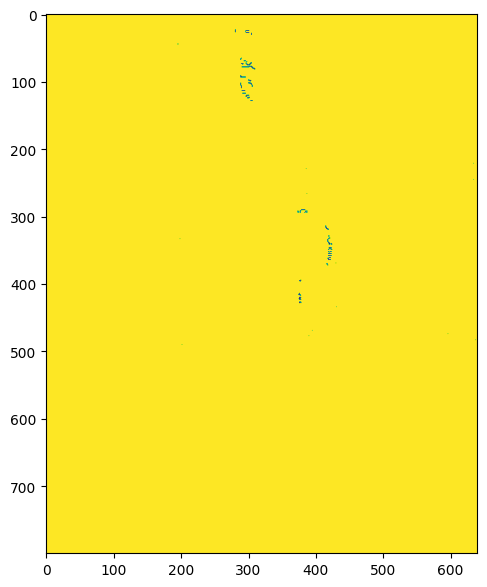

In [ ]:
image = cv2.cvtColor(thresh, cv2.COLOR_RGB2GRAY)
plt.figure(figsize = (7, 7))
plt.imshow(image)

In [ ]:
image.shape

(800, 640)

264


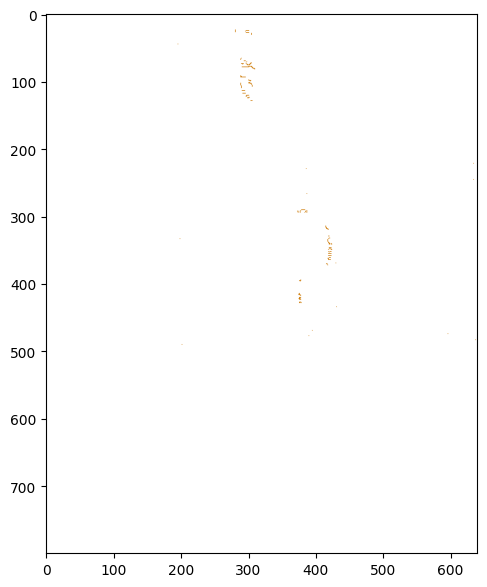

In [ ]:
image = thresh.copy()
gray = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

# Set threshold level
threshold_level = 250

# Find coordinates of all pixels below threshold
overlapping_pixels_coords = np.column_stack(np.where(gray < threshold_level))
overlapping_pixels_coords_list = overlapping_pixels_coords.tolist()
print(len(overlapping_pixels_coords_list))

# Create mask of all pixels lower than threshold level
mask = gray < threshold_level

# Color the pixels in the mask
image[mask] = (204, 119, 0)

plt.figure(figsize = (7, 7))
plt.imshow(image)
# cv2.waitKey()

In [ ]:
image.shape

(800, 640, 3)

#Background

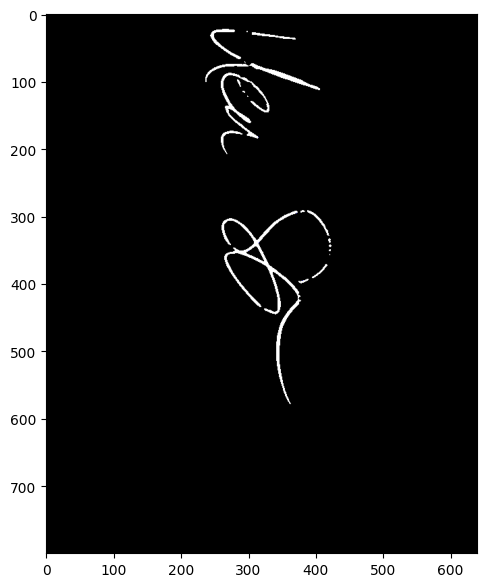

In [ ]:
#backgroung pixels
background_thresh = cv2.threshold(dn_img3, 10, 255, cv2.THRESH_BINARY_INV)[1]
plt.figure(figsize = (7, 7))
plt.imshow(background_thresh)

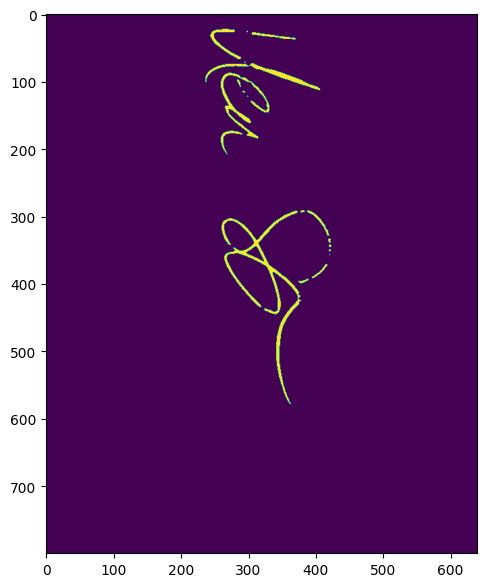

In [ ]:
background = cv2.cvtColor(background_thresh, cv2.COLOR_RGB2GRAY)
plt.figure(figsize = (7, 7))
plt.imshow(background)

505874


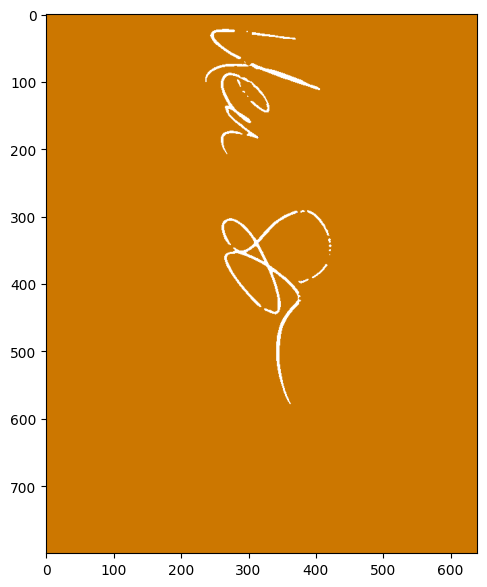

In [ ]:
background_thresh_copy = background_thresh.copy()
gray = cv2.cvtColor(background_thresh, cv2.COLOR_BGR2GRAY)

# Set threshold level
threshold_level = 50

# Find coordinates of all pixels below threshold
background_pixels_coords = np.column_stack(np.where(gray < threshold_level))
background_pixels_coords_list = background_pixels_coords.tolist()
print(len(background_pixels_coords_list))

# Create mask of all pixels lower than threshold level
mask = gray < threshold_level

# Color the pixels in the mask
background_thresh_copy = background_thresh.copy()
background_thresh_copy[mask] = (204, 119, 0)

plt.figure(figsize = (7, 7))
plt.imshow(background_thresh_copy)
# cv2.waitKey()

#Exploratory Data Analysis

In [ ]:
import zipfile

local_zip = '/content/drive/MyDrive/data/HSI FILES/Individual Channel Images/individualChannelImages_03.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/individualChannelImages_03')

zip_ref.close()

In [ ]:
filelist = glob.glob('/content/individualChannelImages_03/content/individualChannels_03/*.jpg')
filelist.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

print(filelist)

['/content/individualChannelImages_03/content/individualChannels_03/channel_0.jpg', '/content/individualChannelImages_03/content/individualChannels_03/channel_1.jpg', '/content/individualChannelImages_03/content/individualChannels_03/channel_2.jpg', '/content/individualChannelImages_03/content/individualChannels_03/channel_3.jpg', '/content/individualChannelImages_03/content/individualChannels_03/channel_4.jpg', '/content/individualChannelImages_03/content/individualChannels_03/channel_5.jpg', '/content/individualChannelImages_03/content/individualChannels_03/channel_6.jpg', '/content/individualChannelImages_03/content/individualChannels_03/channel_7.jpg', '/content/individualChannelImages_03/content/individualChannels_03/channel_8.jpg', '/content/individualChannelImages_03/content/individualChannels_03/channel_9.jpg', '/content/individualChannelImages_03/content/individualChannels_03/channel_10.jpg', '/content/individualChannelImages_03/content/individualChannels_03/channel_11.jpg', '

In [ ]:
x = np.array([np.array(Image.open(fname)) for fname in filelist])
len(x)
# plt.imshow(x[15])

240

In [ ]:
x.shape

(240, 800, 640, 3)

In [ ]:
len(x)

240

In [ ]:
'''Overlapping pixel percentage'''

thresh1 = 100
overlap_mask = []
coords_list_0 = []
coordinates_compare = []
dicts = {}
c = 0

for i in range(len(x)):
  coords = []

  image = x[i]
  dn_img1 = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 5, 15)
  # dn_img2 = cv2.fastNlMeansDenoisingColored(img2, None, 10, 10, 5, 7)
  im_bw1 = cv2.threshold(dn_img1, thresh1, 255, cv2.THRESH_BINARY)[1]
  # im_bw2 = cv2.threshold(dn_img2, thresh2, 255, cv2.THRESH_BINARY)[1]
  overlap = cv2.bitwise_and(cv2.bitwise_not(im_bw1) , cv2.bitwise_not(thresh))
  # plt.figure(figsize = (10, 10))
  # plt.imshow(overlap)

  '''overlapping percentage'''
  totalPixels_overlap = overlap[:,:,0].shape[0] * overlap[:,:,0].shape[1]
  colorPixels_overlap = np.sum(overlap[:, :, 0]) / 255
  perPixels_overlap = colorPixels_overlap / totalPixels_overlap
  print("Percentage of overlapping pixels in ",i,'=', perPixels_overlap*100)


  '''overlapping pixel coordinates'''
  thresh = cv2.threshold(overlap, 10, 255, cv2.THRESH_BINARY_INV)[1]
  gray = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
  threshold_level = 50
  coords = np.column_stack(np.where(gray < threshold_level))        # Find coordinates of all pixels below threshold
  coords_list = coords.tolist()
  print('Pixels Coordinates: ', coords_list)        #coordinates of overlapping pixels
  # new_cube.append(coords_list)

  dicts[i] = coords_list      #getting coordinates for each channel as dictionary entry key:channel number//value:coordinates list

  print('No.of overlapping pixels:' ,len(coords_list))        #number of overlapping pixels
  mask = gray < threshold_level       # Create mask of all pixels lower than threshold level
  # thresh[mask] = (204, 119, 0)      # Color the pixels in the mask
  thresh[mask] = (204, 119, 0)        # Color the pixels in the mask
  overlap_mask.append(thresh)
  # plt.figure(figsize = (10, 10))
  # plt.imshow(thresh)


Percentage of overlapping pixels in  0 = 0.0513671875
Pixels Coordinates:  [[23, 280], [24, 280], [24, 296], [24, 297], [24, 298], [24, 299], [24, 300], [25, 280], [25, 295], [26, 280], [27, 296], [27, 297], [27, 298], [27, 299], [27, 300], [28, 304], [29, 304], [30, 304], [44, 195], [65, 289], [66, 288], [67, 288], [69, 294], [69, 295], [70, 297], [72, 296], [72, 303], [72, 304], [73, 289], [73, 290], [73, 291], [73, 296], [73, 302], [73, 303], [74, 291], [74, 297], [74, 298], [74, 301], [74, 302], [75, 298], [75, 299], [75, 300], [75, 301], [77, 301], [77, 302], [77, 303], [77, 304], [78, 290], [78, 291], [78, 292], [78, 293], [78, 294], [78, 295], [78, 296], [78, 297], [78, 298], [78, 299], [78, 300], [78, 304], [78, 305], [79, 305], [79, 306], [80, 306], [80, 307], [80, 308], [81, 308], [81, 309], [91, 288], [92, 288], [92, 289], [93, 288], [93, 289], [93, 290], [93, 291], [93, 292], [93, 293], [93, 294], [93, 295], [97, 300], [98, 300], [98, 301], [98, 302], [98, 303], [99, 302], 

In [ ]:
print(dicts)

{0: [[23, 280], [24, 280], [24, 296], [24, 297], [24, 298], [24, 299], [24, 300], [25, 280], [25, 295], [26, 280], [27, 296], [27, 297], [27, 298], [27, 299], [27, 300], [28, 304], [29, 304], [30, 304], [44, 195], [65, 289], [66, 288], [67, 288], [69, 294], [69, 295], [70, 297], [72, 296], [72, 303], [72, 304], [73, 289], [73, 290], [73, 291], [73, 296], [73, 302], [73, 303], [74, 291], [74, 297], [74, 298], [74, 301], [74, 302], [75, 298], [75, 299], [75, 300], [75, 301], [77, 301], [77, 302], [77, 303], [77, 304], [78, 290], [78, 291], [78, 292], [78, 293], [78, 294], [78, 295], [78, 296], [78, 297], [78, 298], [78, 299], [78, 300], [78, 304], [78, 305], [79, 305], [79, 306], [80, 306], [80, 307], [80, 308], [81, 308], [81, 309], [91, 288], [92, 288], [92, 289], [93, 288], [93, 289], [93, 290], [93, 291], [93, 292], [93, 293], [93, 294], [93, 295], [97, 300], [98, 300], [98, 301], [98, 302], [98, 303], [99, 302], [101, 300], [102, 288], [102, 300], [102, 301], [102, 302], [102, 303],

In [ ]:
ch_list = []
print_list = []

print_coord = []
hand_coord = []
print_total_channels = []
hand_total_channels = []

from collections import Counter
coordinates_compare = dicts.get(15)

for i in coordinates_compare:
  word = i
  counter = 0

  for key, values in dicts.items():
    if word in values:

      counter +=1
      # print(key)
      ch_list.append(key)

  print_list.insert(0, ch_list[-1])
  c = print_list[0]
  for j in range(241 - len(ch_list)):
    c+=1
    print_list.append(c)

  print_coord.append(word)
  hand_coord.append(word)
  print_total_channels.append(len(print_list))
  hand_total_channels.append(len(ch_list))

  print('handwriting: ', ch_list)
  print('printed text: ', print_list)
  print_list = []
  ch_list = []
  print(i, ' = ', counter)

len(ch_list)

handwriting:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
printed text:  [132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,

0

In [ ]:
ch_list = []

from collections import Counter
coordinates_compare = dicts.get(15)

for i in coordinates_compare:
  word = i
  counter = 0

  for key, values in dicts.items():
    if word in values:

      counter +=1
      # print(key)
      ch_list.append(key)

  print_list.insert(0, (ch_list[-1]+1))
  c = print_list[0]
  for x in range(240 - len(ch_list)):
    c+=1
    print_list.append(c)

  print(i, ' = ', (len(print_list)-1))
  print('printed text: ', print_list)
  print(i, ' = ', counter)
  print('handwritten text: ', ch_list)

  print_list = []
  ch_list = []

[24, 280]  =  107
printed text:  [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240]
[24, 280]  =  133
handwritten text:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99

#Implementation Through Python File

In [ ]:
!pip install -r /content/drive/MyDrive/thesis_python/requirements.txt

In [ ]:
!python /content/drive/MyDrive/thesis_python/thesis_python_code.py

(800, 640, 240)
/usr/local/lib/python3.10/dist-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)
25Bg3
(800, 640, 240)
Directory /content/'25Bg3' already exists. Continuing...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
2